<a href="https://colab.research.google.com/github/AftabUdaipurwala/ApporachingAlmostAnyMachineLearningProblem/blob/master/AAAMLP1_C1_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

# Data

In [ ]:
data = datasets.fetch_openml('mnist_784', return_X_y=True,version=1)
pixel_values, targets = data
targets = targets.astype(int)


# Sample Image

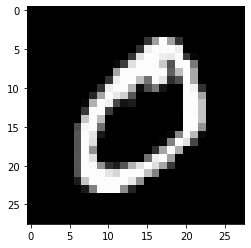

In [ ]:
single_image = np.array(pixel_values.iloc[1]).reshape(28,28)
plt.imshow(single_image,cmap='gray')

# TSNE model

In [ ]:
tsne = manifold.TSNE(n_components=2,random_state=42)
transformed_data= tsne.fit_transform(pixel_values.iloc[:3000,:])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data,targets[:3000])),columns =['x','y','targets']) # here (()) are necessary
tsne_df.loc[:,'targets']= tsne_df.targets.astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


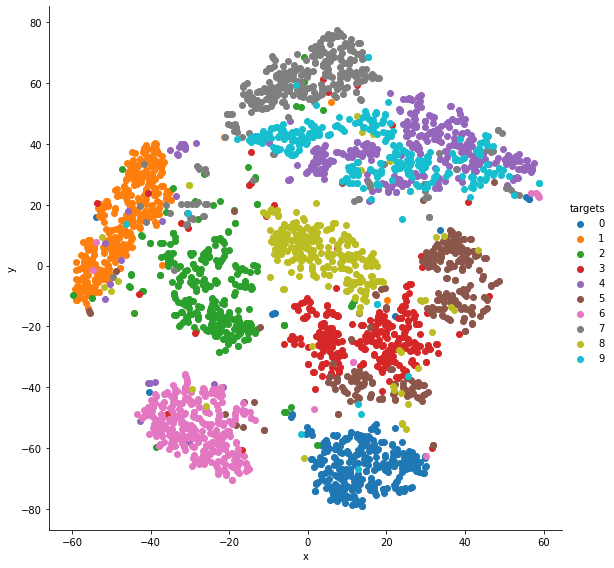

In [ ]:
grid = sns.FacetGrid(tsne_df, hue='targets', size=8)
grid.map(plt.scatter,'x','y').add_legend()